Train Decision Tree on Classification Task

In [1]:
import pandas as pd

# Load the dataset
dataset_path = r"C:\Users\71591\Desktop\dataset\online_gaming_behavior_dataset.csv"
data = pd.read_csv(dataset_path)

# Check the first few rows of the dataset
data.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [2]:
# Target column is 'EngagementLevel'
X = data.drop('EngagementLevel', axis=1)  # Features
y = data['EngagementLevel']  # Target variable

# Check for any missing values in the dataset
print(data.isnull().sum())


# If there are categorical features, encode them to numerical values
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoder to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])


PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Check the shapes to confirm the split
print(X_train.shape, X_test.shape)


(32027, 12) (8007, 12)


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with limitations
clf = DecisionTreeClassifier(random_state=1234, 
                             max_depth=5,               # Limit the depth of the tree
                             min_samples_split=10,       # Minimum samples required to split a node
                             min_samples_leaf=5,         # Minimum samples required for a leaf node
                             max_leaf_nodes=20           # Maximum number of leaf nodes
                            )

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=5,
                       min_samples_split=10, random_state=1234)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8520
              precision    recall  f1-score   support

        High       0.90      0.81      0.85      2062
         Low       0.87      0.76      0.81      2060
      Medium       0.82      0.92      0.87      3885

    accuracy                           0.85      8007
   macro avg       0.87      0.83      0.85      8007
weighted avg       0.86      0.85      0.85      8007



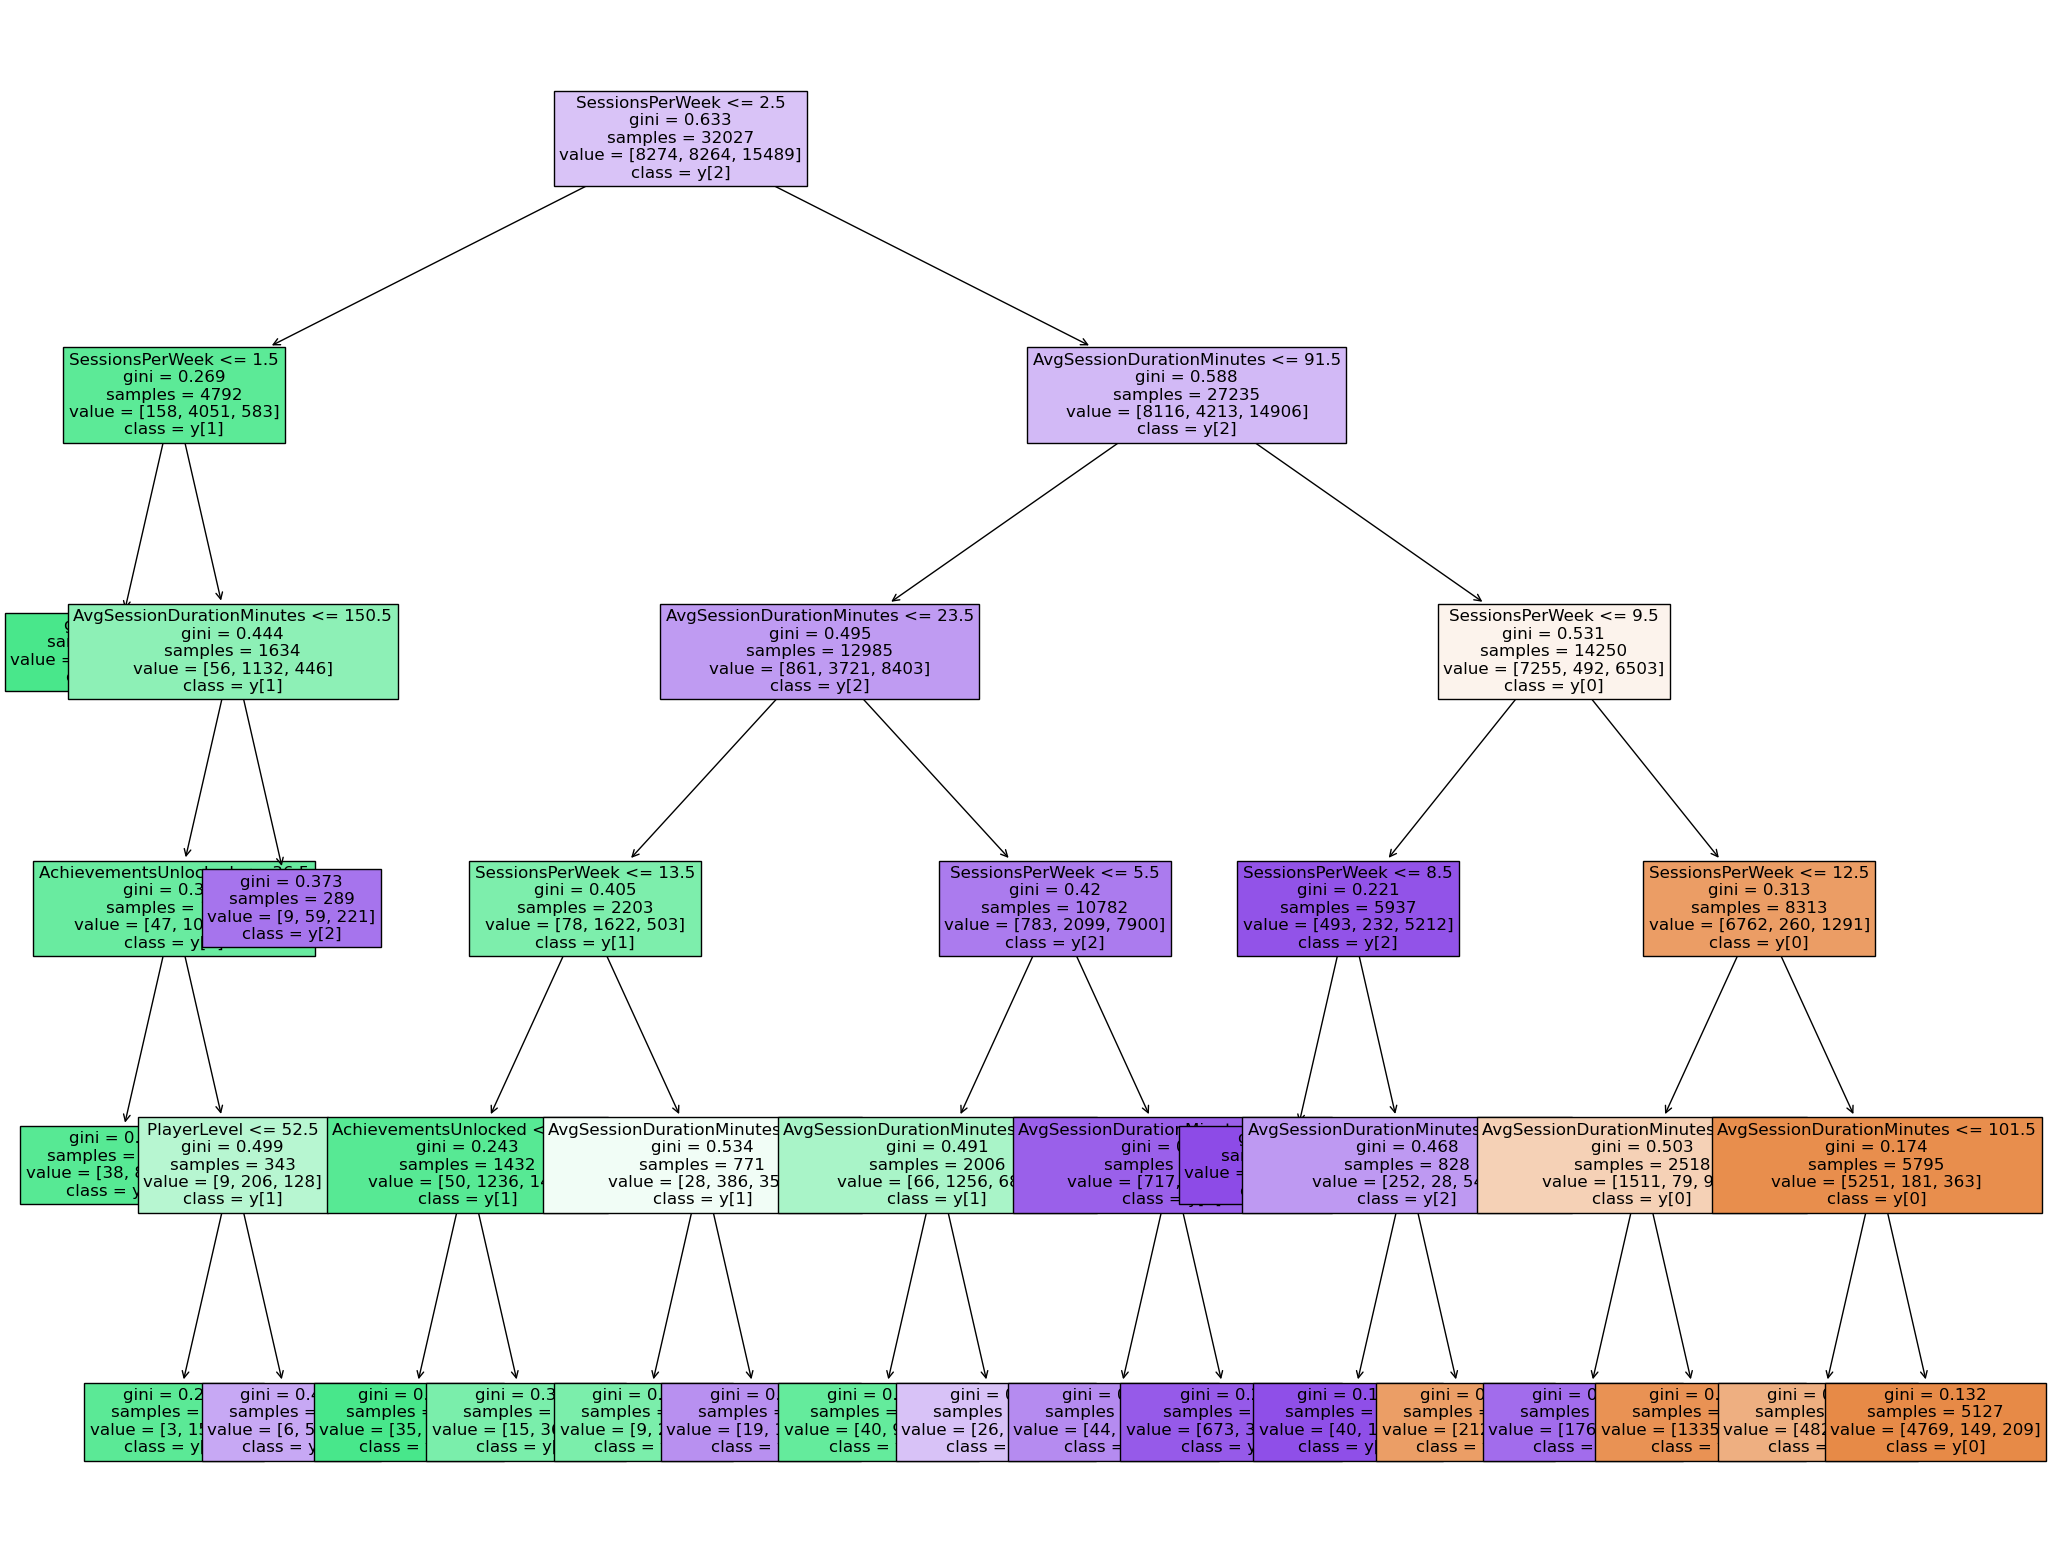

In [9]:
from matplotlib import pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, fontsize=12)
plt.show()


Visualizing the Decision Tree in Regression Task      

In [11]:
from sklearn.preprocessing import LabelEncoder

# Convert target variable 'EngagementLevel' to numeric values
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Split the data into training and testing sets again (in case of any changes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize and fit the Decision Tree Regressor
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X_train, y_train)


|--- feature_9 <= 101.50
|   |--- feature_8 <= 4.50
|   |   |--- feature_8 <= 2.50
|   |   |   |--- value: [1.01]
|   |   |--- feature_8 >  2.50
|   |   |   |--- value: [1.24]
|   |--- feature_8 >  4.50
|   |   |--- feature_9 <= 21.50
|   |   |   |--- value: [1.18]
|   |   |--- feature_9 >  21.50
|   |   |   |--- value: [1.66]
|--- feature_9 >  101.50
|   |--- feature_8 <= 9.50
|   |   |--- feature_8 <= 1.50
|   |   |   |--- value: [1.03]
|   |   |--- feature_8 >  1.50
|   |   |   |--- value: [1.74]
|   |--- feature_8 >  9.50
|   |   |--- feature_8 <= 11.50
|   |   |   |--- value: [0.76]
|   |   |--- feature_8 >  11.50
|   |   |   |--- value: [0.15]



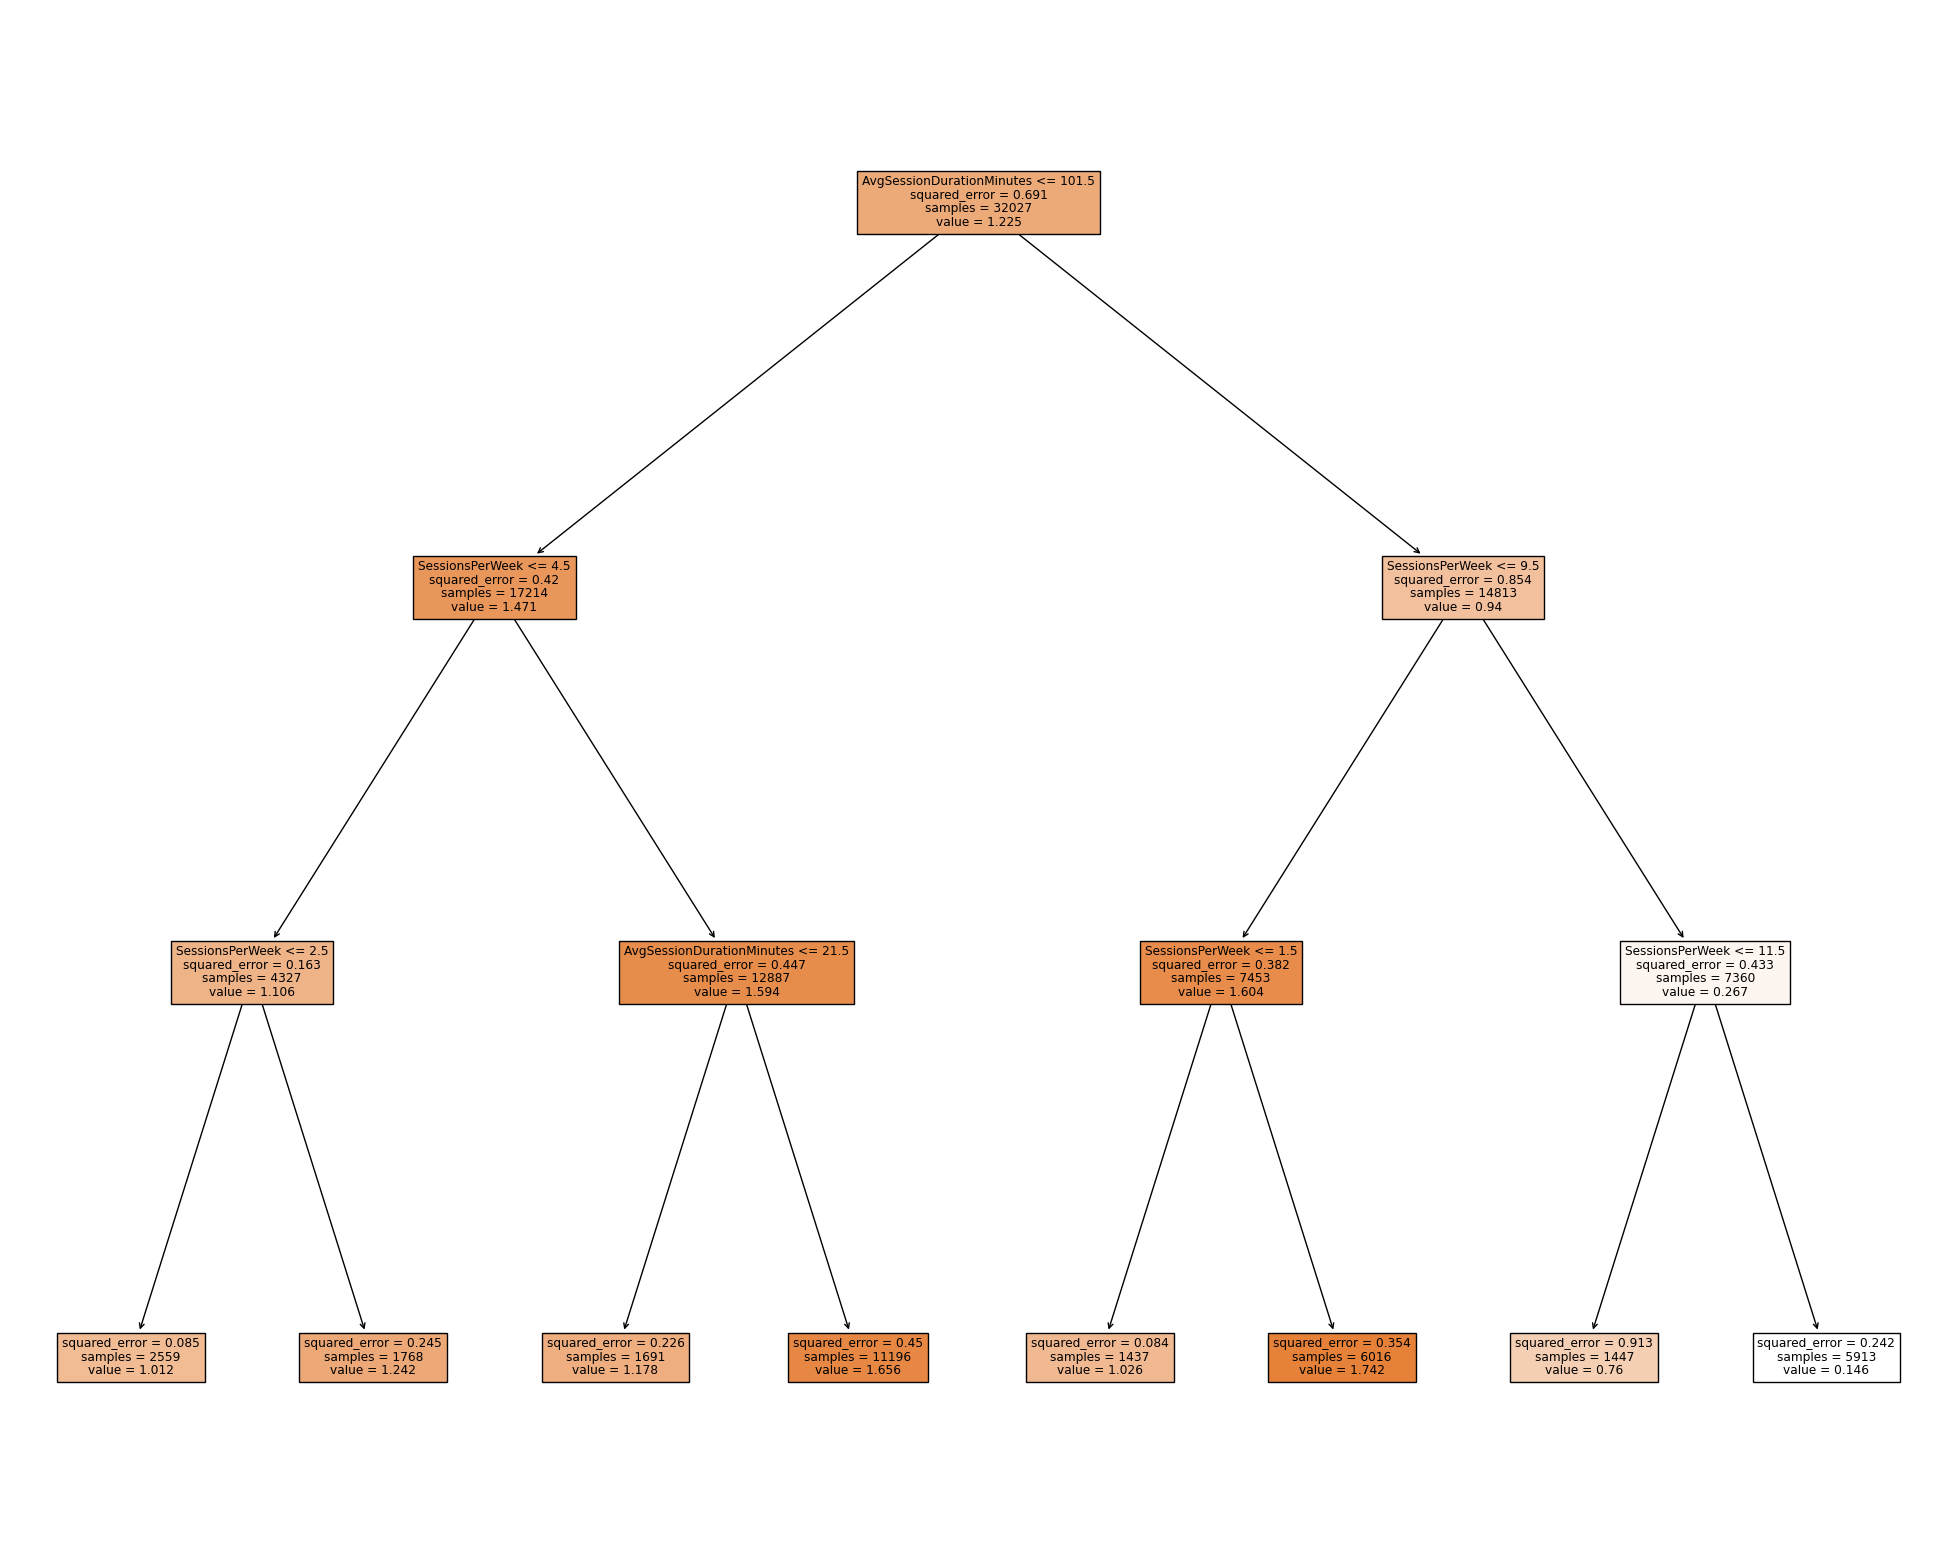

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from dtreeviz import dtreeviz # Ensure dtreeviz is installed

# Text representation of the tree
text_representation = tree.export_text(regr)
print(text_representation)

# Plot the decision tree
plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=X.columns, filled=True)
plt.show()

# DOT data
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=X.columns,  
                                filled=True)

# Draw graph using graphviz
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_regressor_graph")
graph
